<a href="https://colab.research.google.com/github/xiaorui777/NLP/blob/master/Best_First_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best First Search

### 我们根据中国的城市来做一个简易版导航地图

In [0]:
coordination_source = """
{name:'lanzhou', geoCoord:[103.73, 36.03]},
{name:'jiayuguan', geoCoord:[98.17, 39.47]},
{name:'xining', geoCoord:[101.74, 36.56]},
{name:'chengdu', geoCoord:[104.06, 30.67]},
{name:'shijiazhuang', geoCoord:[114.48, 38.03]},
{name:'lasa', geoCoord:[102.73, 25.04]},
{name:'guiyang', geoCoord:[106.71, 26.57]},
{name:'wuhan', geoCoord:[114.31, 30.52]},
{name:'zhengzhou', geoCoord:[113.65, 34.76]},
{name:'jinan', geoCoord:[117, 36.65]},
{name:'nanjing', geoCoord:[118.78, 32.04]},
{name:'hefei', geoCoord:[117.27, 31.86]},
{name:'hangzhou', geoCoord:[120.19, 30.26]},
{name:'nanchang', geoCoord:[115.89, 28.68]},
{name:'fuzhou', geoCoord:[119.3, 26.08]},
{name:'guangzhou', geoCoord:[113.23, 23.16]},
{name:'changsha', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'shengyang', geoCoord:[123.38, 41.8]},
{name:'changchun', geoCoord:[125.35, 43.88]},
{name:'haorbing', geoCoord:[126.63, 45.75]},
{name:'taiyuan', geoCoord:[112.53, 37.87]},
{name:'xian', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'beijing', geoCoord:[116.46, 39.92]},
{name:'shanghai', geoCoord:[121.48, 31.22]},
{name:'chongqing', geoCoord:[106.54, 29.59]},
{name:'tianjing', geoCoord:[117.2, 39.13]},
{name:'huhehaote', geoCoord:[111.65, 40.82]},
{name:'nanning', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'yinchuan', geoCoord:[106.27, 38.47]},
{name:'wulumuqi', geoCoord:[87.68, 43.77]},
{name:'xiangang', geoCoord:[114.17, 22.28]},
{name:'aomen', geoCoord:[113.54, 22.19]}
"""

In [0]:
import re

In [0]:
# 用字典存放城市名和坐标
city_location = {}
#{
# city_name: ()
#}

In [4]:
# 一行一行读（split（'\n'）换行）
for line in coordination_source.split('\n'):
    # 只考虑中国大陆， //之后的地名是隔海的不考虑
    if line.startswith('//'):continue
    if line.strip() == '': continue
    
    city = re.findall("name:'(\w+)'", line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    # 将坐标列表转化为元组
    x_y = tuple(map(float,x_y))
    city_location[city] = x_y
    print(city, x_y)

lanzhou (103.73, 36.03)
jiayuguan (98.17, 39.47)
xining (101.74, 36.56)
chengdu (104.06, 30.67)
shijiazhuang (114.48, 38.03)
lasa (102.73, 25.04)
guiyang (106.71, 26.57)
wuhan (114.31, 30.52)
zhengzhou (113.65, 34.76)
jinan (117.0, 36.65)
nanjing (118.78, 32.04)
hefei (117.27, 31.86)
hangzhou (120.19, 30.26)
nanchang (115.89, 28.68)
fuzhou (119.3, 26.08)
guangzhou (113.23, 23.16)
changsha (113.0, 28.21)
shengyang (123.38, 41.8)
changchun (125.35, 43.88)
haorbing (126.63, 45.75)
taiyuan (112.53, 37.87)
xian (108.95, 34.27)
beijing (116.46, 39.92)
shanghai (121.48, 31.22)
chongqing (106.54, 29.59)
tianjing (117.2, 39.13)
huhehaote (111.65, 40.82)
nanning (108.33, 22.84)
yinchuan (106.27, 38.47)
wulumuqi (87.68, 43.77)
xiangang (114.17, 22.28)
aomen (113.54, 22.19)


In [0]:
import math

In [0]:
# 将经纬度投射到平面上得到两地距离
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [0]:
def get_city_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [8]:
get_city_distance('hangzhou','shanghai')

153.5185697155768

In [0]:
# 用网络画图
import networkx as nx

In [0]:
cities = list(city_location.keys())

In [11]:
cities

['lanzhou',
 'jiayuguan',
 'xining',
 'chengdu',
 'shijiazhuang',
 'lasa',
 'guiyang',
 'wuhan',
 'zhengzhou',
 'jinan',
 'nanjing',
 'hefei',
 'hangzhou',
 'nanchang',
 'fuzhou',
 'guangzhou',
 'changsha',
 'shengyang',
 'changchun',
 'haorbing',
 'taiyuan',
 'xian',
 'beijing',
 'shanghai',
 'chongqing',
 'tianjing',
 'huhehaote',
 'nanning',
 'yinchuan',
 'wulumuqi',
 'xiangang',
 'aomen']

In [0]:
# 建立一个空图
city_graph = nx.Graph()

In [0]:
# 添加节点
city_graph.add_nodes_from(cities)

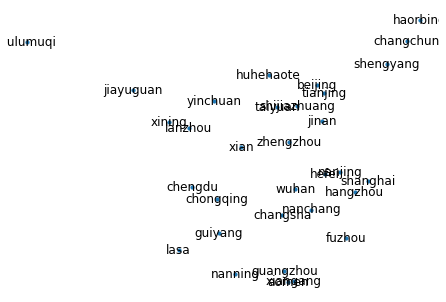

In [14]:
# 网络可视化
nx.draw(city_graph,city_location,with_labels = True, node_size = 10)

In [15]:
get_city_distance('hangzhou','shanghai')

153.5185697155768

In [16]:
get_city_distance('xian','lanzhou')

582.9782141643079

In [0]:
# 如果两地之间的距离小于700，那么就是有路可以连接两地
threshold = 700

In [0]:
from collections import defaultdict

In [0]:
cities_connection = defaultdict(list)

In [20]:
print(cities_connection)

defaultdict(<class 'list'>, {})


In [0]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2: continue
            
        if get_city_distance(c1,c2)<threshold:
            cities_connection[c1].append(c2)

In [22]:
print(cities_connection)

defaultdict(<class 'list'>, {'lanzhou': ['jiayuguan', 'xining', 'chengdu', 'lasa', 'guiyang', 'xian', 'chongqing', 'nanning', 'yinchuan'], 'jiayuguan': ['lanzhou', 'xining', 'chengdu', 'lasa'], 'xining': ['lanzhou', 'jiayuguan', 'chengdu', 'lasa', 'guiyang', 'chongqing', 'yinchuan'], 'chengdu': ['lanzhou', 'jiayuguan', 'xining', 'lasa', 'guiyang', 'xian', 'chongqing', 'nanning', 'yinchuan'], 'shijiazhuang': ['wuhan', 'zhengzhou', 'jinan', 'nanjing', 'hefei', 'nanchang', 'guangzhou', 'changsha', 'taiyuan', 'xian', 'beijing', 'tianjing', 'huhehaote'], 'lasa': ['lanzhou', 'jiayuguan', 'xining', 'chengdu', 'guiyang', 'chongqing', 'nanning', 'yinchuan'], 'guiyang': ['lanzhou', 'xining', 'chengdu', 'lasa', 'xian', 'chongqing', 'nanning', 'yinchuan'], 'wuhan': ['shijiazhuang', 'zhengzhou', 'jinan', 'nanjing', 'hefei', 'hangzhou', 'nanchang', 'fuzhou', 'guangzhou', 'changsha', 'taiyuan', 'xian', 'beijing', 'tianjing', 'huhehaote', 'xiangang', 'aomen'], 'zhengzhou': ['shijiazhuang', 'wuhan', 'j

In [23]:
cities_connection['lanzhou']

['jiayuguan',
 'xining',
 'chengdu',
 'lasa',
 'guiyang',
 'xian',
 'chongqing',
 'nanning',
 'yinchuan']

In [0]:
cities_connection_graph = nx.Graph(cities_connection)

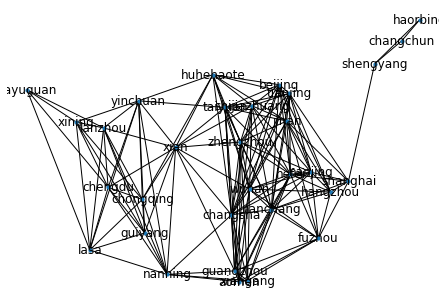

In [25]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size = 10)

In [0]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [0]:
def search(graph, start, is_goal, search_strategy):
    # 把起点加入路径
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        # 把pathes中起点删除，加到path中
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
        #print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [28]:
search(cities_connection, start='xian', is_goal=is_goal('shanghai'),search_strategy=lambda n: n)

['xian', 'shijiazhuang', 'jinan', 'shanghai']

In [0]:
# 只从最好的n个中搜索（beam）
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [30]:
search(cities_connection, start='beijing', is_goal=is_goal('lasa'), search_strategy=lambda n: n)

['beijing', 'changsha', 'nanning', 'lasa']

In [0]:
# 排序函数：加起来的距离最短
def get_path_distance(path):
    distance = 0
    
    for i, c in enumerate(path[:-1]):
        distance += get_city_distance(c, path[i+1])
    
    return distance


In [0]:
# 总站数
def get_total_station(path):
    return len(path)

In [0]:
# 结合最优总距离和总站数
def get_comprehensive_path(path):
    return get_path_distance(path) + get_total_station(path)

In [0]:
# 想去尽可能多的城市
def get_as_much_path(path): 
    return -1 * len(path)

In [35]:
get_path_distance(['beijing', 'changsha'])

665.2271362574077

In [36]:
search(cities_connection, start='beijing', is_goal=is_goal('lasa'), search_strategy=lambda n:n)

['beijing', 'changsha', 'nanning', 'lasa']

In [37]:
search(cities_connection, start='beijing', is_goal=is_goal('xian'), search_strategy=sort_path(get_total_station))

['beijing', 'shijiazhuang', 'xian']

In [38]:
search(cities_connection, start='beijing', is_goal=is_goal('lasa'), search_strategy=sort_path(get_comprehensive_path))

['beijing', 'huhehaote', 'yinchuan', 'lasa']

In [39]:
search(cities_connection, start='beijing', is_goal=is_goal('lasa'), search_strategy=sort_path(get_as_much_path))

['beijing',
 'shijiazhuang',
 'wuhan',
 'zhengzhou',
 'jinan',
 'nanjing',
 'hefei',
 'hangzhou',
 'nanchang',
 'fuzhou',
 'guangzhou',
 'changsha',
 'taiyuan',
 'xian',
 'lanzhou',
 'lasa']